## Name : Khairul Basar
## Roll : 1811176143

## Import necessary library 

In [2]:

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score

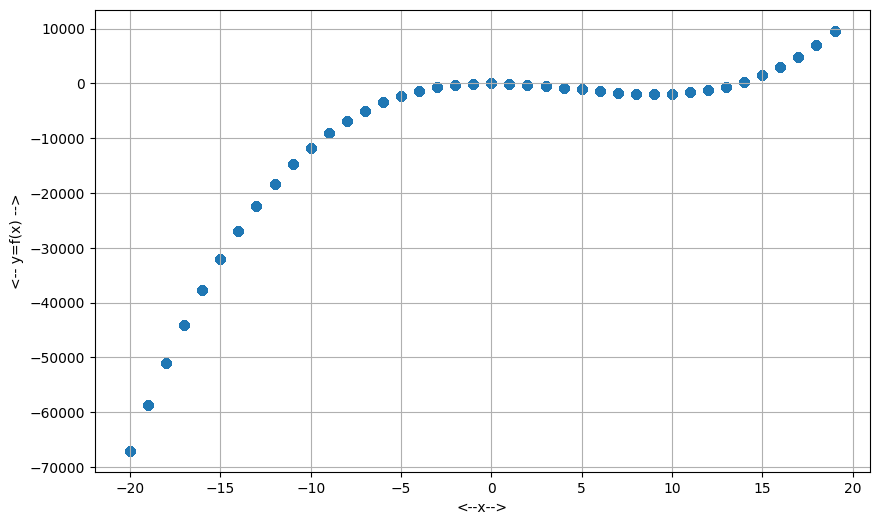

In [3]:
samples = 7000
x = np.random.randint(-20, 20, samples, dtype=int)
y = 5 * (x**3) - 68 * (x**2) - 7 * x + 1

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('<--x-->')
plt.ylabel('<-- y=f(x) -->')
plt.grid()

plt.show()

In [4]:
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1

#print(len(x_normalized), len(y_normalized))

In [5]:
x_train = x_normalized[ : int(len(x_normalized) * 0.8)]
y_train = y_normalized[: int(len(y_normalized) * 0.8)]

x_validate = x_normalized[int(len(x_normalized) * 0.8) : int(len(x_normalized) * 0.90)]
y_validate = y_normalized[int(len(y_normalized) * 0.8) : int(len(y_normalized) * 0.90)]

x_test = x_normalized[int(len(x_normalized) * 0.90) : ]
y_test = y_normalized[int(len(y_normalized) * 0.90) : ]

print(len(x_test), len(y_test))

700 700


In [6]:
inputs = Input(shape=(1), name = 'inputLayer')

h_layer = Dense(units = 32, activation = 'relu', name = 'hidden_layer1')(inputs)
h_layer = Dense(units = 64, activation = 'relu', name = 'hidden_layer2')(h_layer)
h_layer = Dense(units = 128, activation = 'relu', name = 'hidden_layer3')(h_layer)

outputs = Dense(units = 1, name = 'outputLayer')(h_layer)
model = Model(inputs, outputs, name = 'DNN_Model')
model.summary()


Model: "DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 1)]               0         
                                                                 
 hidden_layer1 (Dense)       (None, 32)                64        
                                                                 
 hidden_layer2 (Dense)       (None, 64)                2112      
                                                                 
 hidden_layer3 (Dense)       (None, 128)               8320      
                                                                 
 outputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='mean_squared_error',
    metrics=R2Score()
)


In [8]:
history = model.fit(x_train, y_train, epochs = 5, validation_data = (x_validate, y_validate))

Epoch 1/5



175/175 [==============================] - 6s 9ms/step - loss: 0.0491 - r2_score: 0.7810 - val_loss: 9.1596e-04 - val_r2_score: 0.9957
Epoch 2/5
175/175 [==============================] - 1s 4ms/step - loss: 6.9286e-04 - r2_score: 0.9969 - val_loss: 4.2350e-04 - val_r2_score: 0.9980
Epoch 3/5
175/175 [==============================] - 1s 5ms/step - loss: 3.3387e-04 - r2_score: 0.9985 - val_loss: 2.4666e-04 - val_r2_score: 0.9989
Epoch 4/5
175/175 [==============================] - 1s 5ms/step - loss: 2.0419e-04 - r2_score: 0.9991 - val_loss: 1.9502e-04 - val_r2_score: 0.9991
Epoch 5/5
175/175 [==============================] - 1s 6ms/step - loss: 1.1654e-04 - r2_score: 0.9995 - val_loss: 9.3396e-05 - val_r2_score: 0.9996


In [9]:
y_pred = model.predict(x_test)

22/22 [==============================] - 1s 7ms/step


In [10]:
x_test = ((x_test + 1) * (np.max(x) - np.min(x)) / 2) + np.min(x)
y_test = ((y_test + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)
y_pred = ((y_pred + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)

In [11]:
print('Actual X Value: ', x_test[6])
print('Actual Y Value: ', y_test[6])
print('Predicted Y Value: ', y_pred[6])

Actual X Value:  4.0
Actual Y Value:  -795.0
Predicted Y Value:  [-827.91279387]


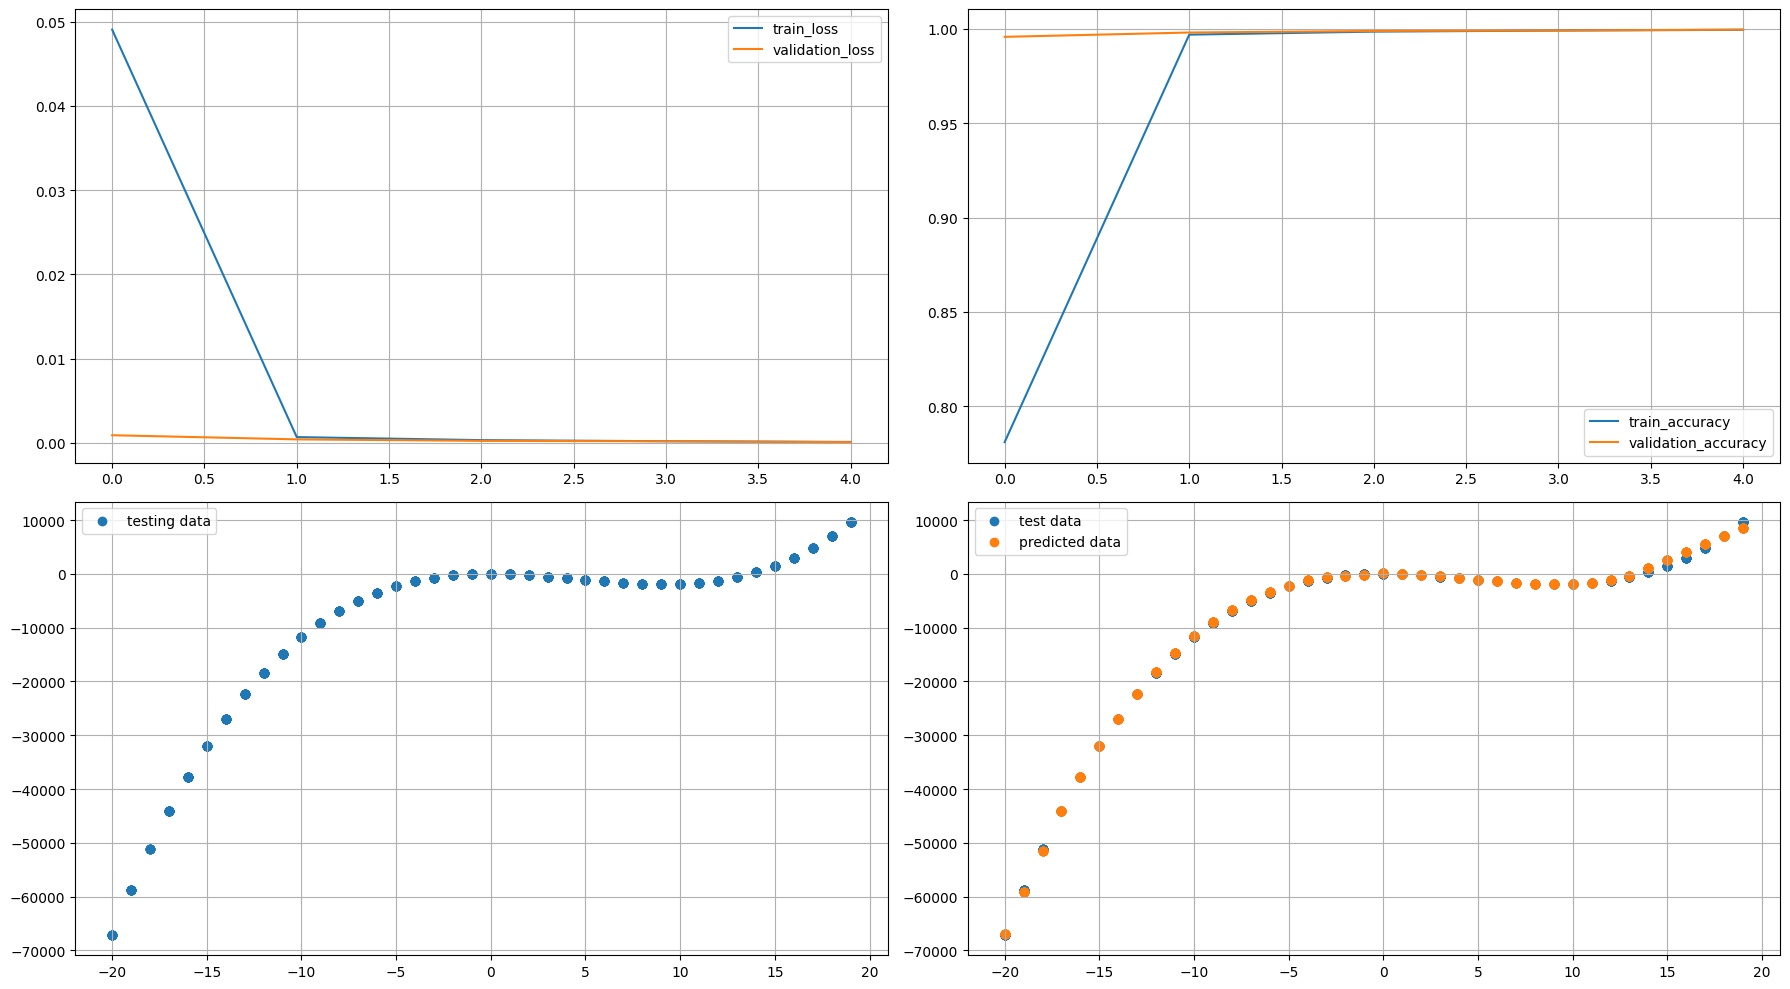

In [12]:
performance_dict = history.history
plt.figure(figsize = (18, 10))

plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
plt.grid()

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x_test, y_test)
plt.legend(['testing data'])
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.legend(['test data', 'predicted data'])
plt.grid()

plt.tight_layout()
plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

22/22 [==============================] - 1s 12ms/step - loss: 361233760.0000 - r2_score: -0.2682
Test Loss: 361233760.0
Test Accuracy: -0.2681748867034912
